## Overview
This proect aims to develop a predictive model that can determine whether an arrest will be made during a Terry Stop based on various factors. The aim is to provide actionable insights that can help law enforcement agencies optimize their stop-and-search strategies, ensure public safety, and address concerns related to racial profiling and fairness in policing. 

### Business Understanding: Enhancing Law Enforcement Practices
Terry Stops, based on Terry v. Ohio (1968), are brief stops and searches by police based on reasonable suspicion. These stops raise concerns about fairness and potential bias. The business challenge is to predict the likelihood of an arrest during a Terry Stop to improve decision-making and address potential biases. The business understanding of the project is to enhance law enforcement practices by providing a platform for data-driven decision. This project benefits law enforcement by improving efficiency and fairness, policymakers by providing data-driven insights, and the public by fostering trust and reducing unjustified stops and arrests.

In [1]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data
The data has 61050 rows and 23 columns

In [13]:
# Load the data
terry_df = pd.read_csv('data/Terry_Stops.csv')
terry_df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,1 - 17,-1,20170000315550,301338,Offense Report,NaN,5489,1964,M,White,...,00:10:00.0000000,NUISANCE,--MISCHIEF OR NUISANCE - GENERAL,911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,N,N2
1,26 - 35,-1,20170000115391,253596,Offense Report,NaN,6403,1969,M,White,...,16:04:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - ALL OTHER,"TELEPHONE OTHER, NOT 911",NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
2,18 - 25,-1,20160000036392,123863,Offense Report,NaN,7473,1981,M,White,...,02:26:00.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,B,B3
3,36 - 45,33919122751,20210000055627,21770133324,Field Contact,-,6711,1977,M,White,...,14:42:43.0000000,PROPERTY - DAMAGE,--DISTURBANCE - OTHER,911,SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2,N,N,-,-,-
4,18 - 25,-1,20160000003522,183376,Field Contact,NaN,7090,1981,F,White,...,15:49:00.0000000,-,-,-,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,Y,-,-,-


In [14]:
# Data information
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61050 entries, 0 to 61049
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61050 non-null  object
 1   Subject ID                61050 non-null  int64 
 2   GO / SC Num               61050 non-null  int64 
 3   Terry Stop ID             61050 non-null  int64 
 4   Stop Resolution           61050 non-null  object
 5   Weapon Type               28485 non-null  object
 6   Officer ID                61050 non-null  object
 7   Officer YOB               61050 non-null  int64 
 8   Officer Gender            61050 non-null  object
 9   Officer Race              61050 non-null  object
 10  Subject Perceived Race    61050 non-null  object
 11  Subject Perceived Gender  61050 non-null  object
 12  Reported Date             61050 non-null  object
 13  Reported Time             61050 non-null  object
 14  Initial Call Type     

In [12]:
terry_df.shape


(61050, 23)

## Checking for Missing Values
The weapon type column has 32565 missing values and officer squad has 561 missing values.

In [15]:
#  check for missing data in the dataset
missing_values = terry_df.isnull().sum()
missing_values

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

## Analyze the Categorical Features

In [17]:
# List of categorical columns to analyze
categorical_cols = ['Subject Age Group', 'Weapon Type', 'Stop Resolution', 'Subject Perceived Race', 'Subject Perceived Gender']

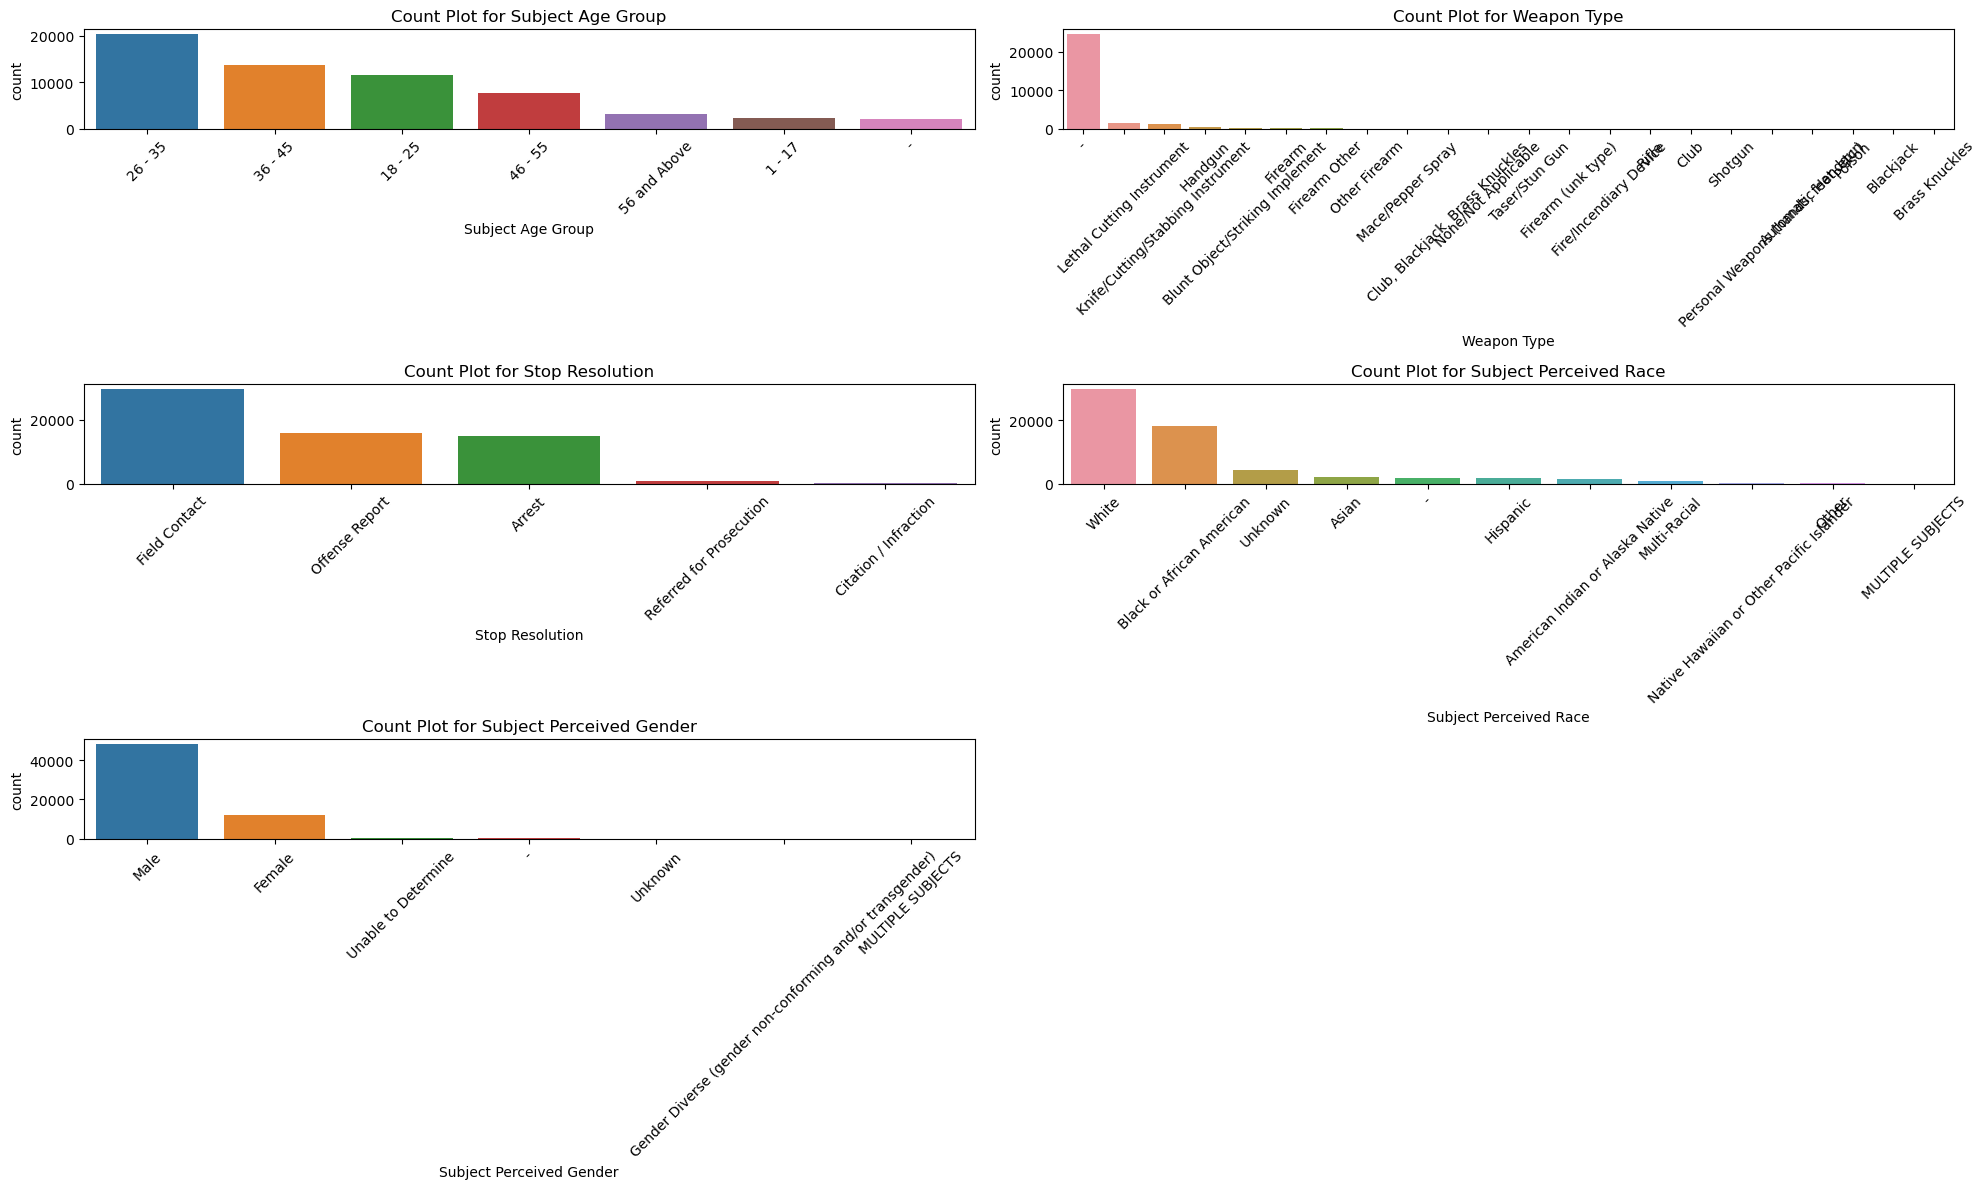

In [22]:
# Plot count plots for each categorical feature
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=terry_df, order=terry_df[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze the Distribution of the Target Variable (Arrest Flag)